<a href="https://colab.research.google.com/github/lukaszplust/ML_and_DL_projects/blob/main/Linear_Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [528]:
df_copy = pd.read_csv("imdb_top_1000.csv")
df = df_copy
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [529]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [530]:
df.dtypes

,0
Poster_Link,object
Series_Title,object
Released_Year,object
Certificate,object
Runtime,object
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64
Director,object


In [531]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link - Link of the poster that imdb using

Series_Title = Name of the movie

Released_Year - Year at which that movie released

Certificate - Certificate earned by that movie

Runtime - Total runtime of the movie

Genre - Genre of the movie

IMDB_Rating - Rating of the movie at IMDB site

Overview - mini story/ summary

Meta_score - Score earned by the movie

Director - Name of the Director

Star1,Star2,Star3,Star4 - Name of the Stars

No_of_votes - Total number of votes

Gross - Money earned by that movie

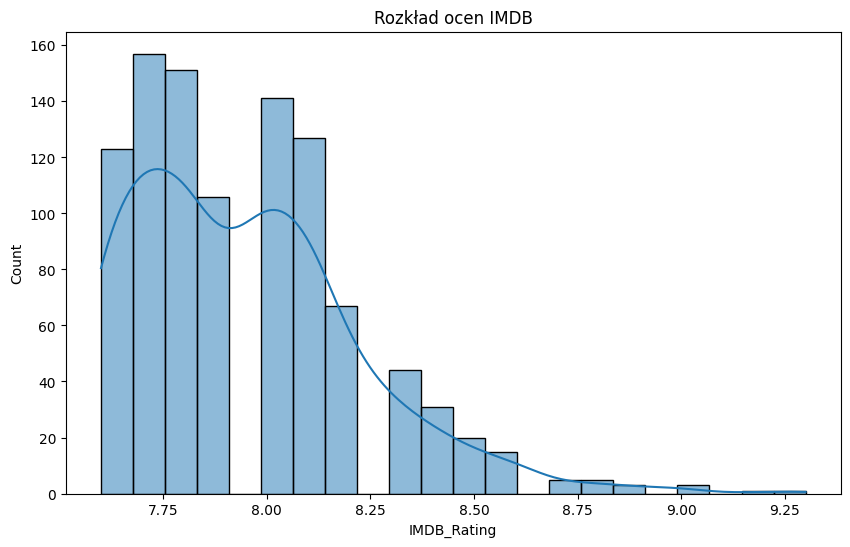

In [533]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('Rozkład ocen IMDB')
plt.show()

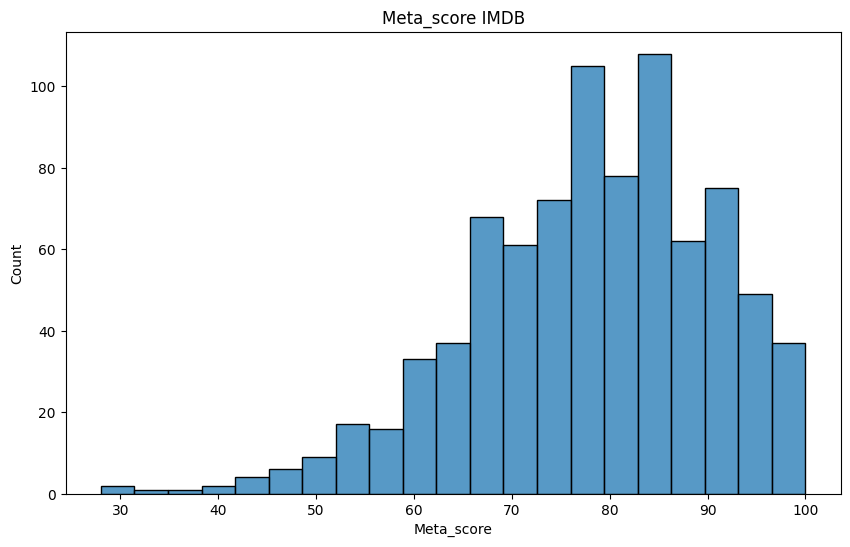

In [534]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Meta_score'])
plt.title('Meta_score IMDB')
plt.show()

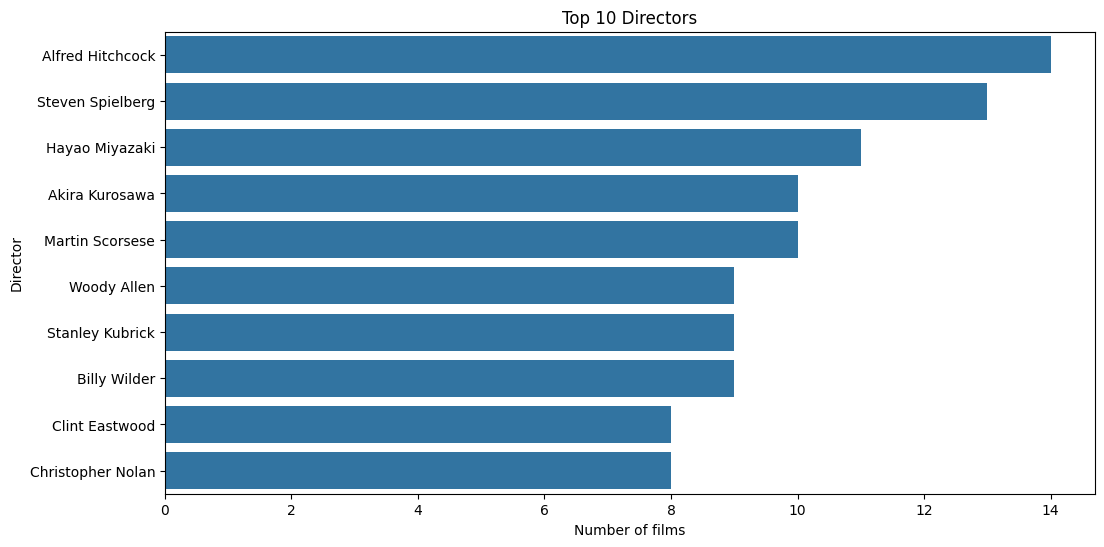

In [535]:
top_directors = df['Director'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors')
plt.xlabel('Number of films')
plt.ylabel('Director')
plt.show()

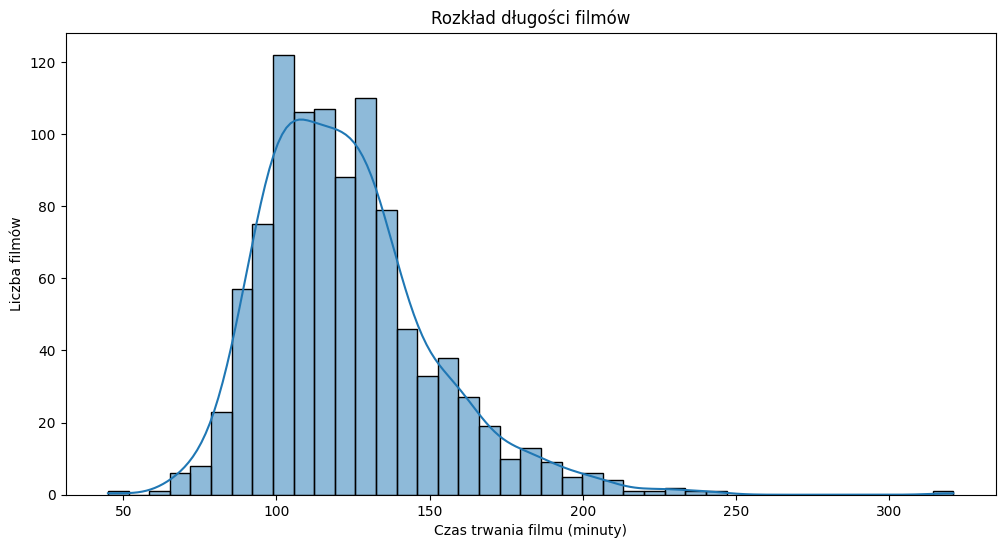

In [536]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# wizualizacja rozkładu długości filmów
plt.figure(figsize=(12, 6))
sns.histplot(df['Runtime'], kde=True)
plt.title('Rozkład długości filmów')
plt.xlabel('Czas trwania filmu (minuty)')
plt.ylabel('Liczba filmów')
plt.show()

CLEARNING DATA

In [537]:
imputer = SimpleImputer(strategy='median')
df['Meta_score'] = imputer.fit_transform(df[['Meta_score']])

In [538]:
df['Meta_score']

,Meta_score
0,80.0
1,100.0
2,84.0
3,90.0
4,96.0
...,...
995,76.0
996,84.0
997,85.0
998,78.0


In [539]:
df['Meta_score'].isnull().sum()

np.int64(0)

In [540]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [541]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [542]:
df = df[df['Released_Year'].str.isnumeric()]

In [543]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

In [544]:
df['Released_Year'].dtype

dtype('O')

In [545]:
df['Released_Year'] = df['Released_Year'].astype(int)

<ipython-input-545-7fed1cae8742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year'] = df['Released_Year'].astype(int)


In [546]:
df['Released_Year'].dtype

dtype('int64')

In [547]:
df['Gross'] = df['Gross'].astype('category').cat.codes

<ipython-input-547-2e74a89b009d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].astype('category').cat.codes


In [548]:
df['Gross']

,Gross
0,383
1,150
2,633
3,661
4,515
...,...
995,-1
996,-1
997,427
998,-1


In [549]:
df['Gross'] = df['Gross'].replace(-1, np.nan)

<ipython-input-549-8336cd4839b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].replace(-1, np.nan)


In [550]:
df['Gross'].dtype

dtype('float64')

In [551]:
df[df['Gross'].isnull()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",79.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [552]:
imputer = SimpleImputer(strategy='median')
df['Gross'] = imputer.fit_transform(df[['Gross']])

<ipython-input-552-30d08069cef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = imputer.fit_transform(df[['Gross']])


In [553]:
df['Gross'].isnull().sum()

np.int64(0)

In [554]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [555]:
df['Gross'].max()

821.0

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 132.7+ KB


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 132.7+ KB


In [558]:
#imputer = SimpleImputer(strategy='most_frequent')
#df['Passed'] = imputer.fit_transform(df[['Passed']])

PREPARE DATA TO MODEL

In [559]:
# wybór cech
X = df[['Released_Year', 'Runtime','No_of_Votes', 'Gross', 'Meta_score']]
# zmienna docelowa
y = df['IMDB_Rating']

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [561]:
X.dtypes

,0
Released_Year,int64
Runtime,int64
No_of_Votes,int64
Gross,float64
Meta_score,float64


In [562]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [563]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Ocena modelu

MSE: 0.0423
RMSE: 0.2058
R²: 0.3533


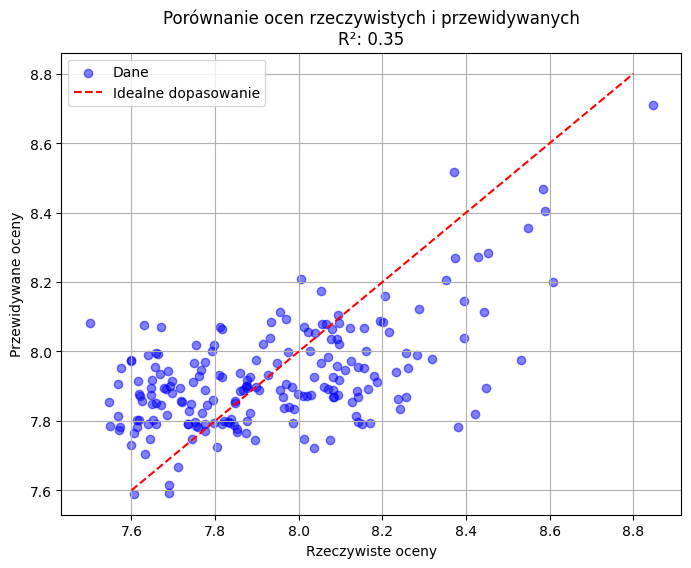

In [564]:
# przewidywania
y_pred = model.predict(X_test_scaled)

# obliczam metryki
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# wyniki
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# WYKRES
plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Dane')
# dodaje troche rozrzutu dla widocznosci, bo to wyzej nachodzi na siebie
plt.scatter(y_test + np.random.normal(0, 0.05, size=len(y_test)), y_pred, color='blue', alpha=0.5, label='Dane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste oceny')
plt.ylabel('Przewidywane oceny')
plt.title(f'Porównanie ocen rzeczywistych i przewidywanych\nR²: {r2:.2f}')
plt.legend()
plt.grid()
plt.show()

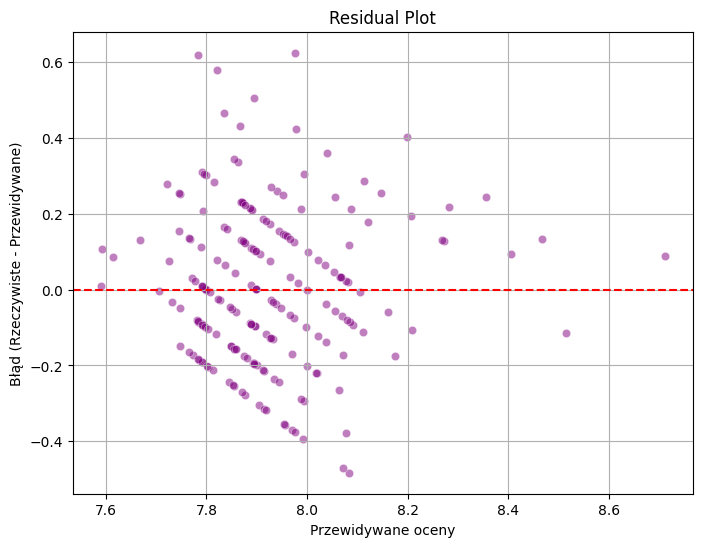

In [565]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Przewidywane oceny')
plt.ylabel('Błąd (Rzeczywiste - Przewidywane)')
plt.title('Residual Plot')
#plt.xlim(7, 8)
#plt.ylim(5, 10)
plt.grid()
plt.show()

New Prediction - own case

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 132.7+ KB


In [567]:
columns = ['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score', 'IMDB_Rating']

# przykładowy wiersz
example = df[columns].iloc[0]
print(example)

Released_Year       1994.0
Runtime              142.0
No_of_Votes      2343110.0
Gross                383.0
Meta_score            80.0
IMDB_Rating            9.3
Name: 0, dtype: float64


In [568]:
# X = df[['Released_Year', 'Runtime','No_of_Votes', 'Gross', 'Meta_score']]
new_movie = np.array([[1994, 142, 2343110, 383, 80]])

# skalowanie
new_movie_scaled = scaler.transform(new_movie)

# przewidywanie
predicted_rating = model.predict(new_movie_scaled)

print(f'Przewidywana ocena IMDB: {predicted_rating[0]:.2f}')

Przewidywana ocena IMDB: 8.91


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


RIDGE REGRESSION

In [569]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

MSE: 0.0423
RMSE: 0.2058
R²: 0.3533


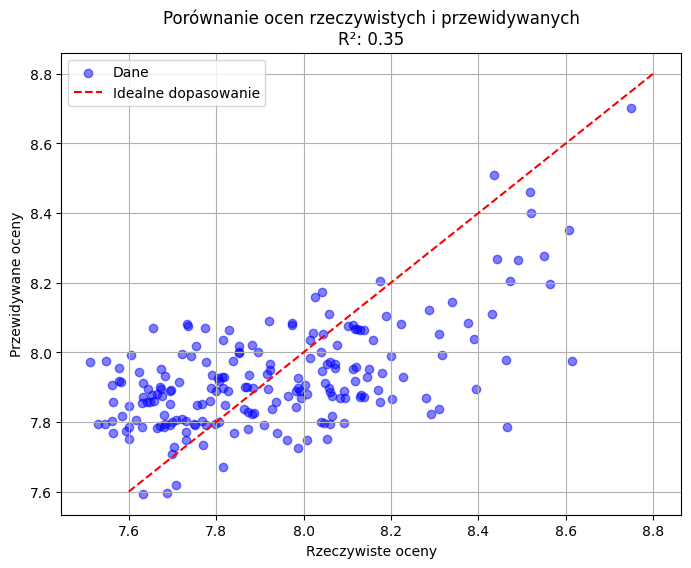

In [570]:
# przewidywania
y_pred = ridge_model.predict(X_test_scaled)

# obliczam metryki
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# wyniki
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# WYKRES
plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Dane')
# dodaje troche rozrzutu dla widocznosci, bo to wyzej nachodzi na siebie
plt.scatter(y_test + np.random.normal(0, 0.05, size=len(y_test)), y_pred, color='blue', alpha=0.5, label='Dane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste oceny')
plt.ylabel('Przewidywane oceny')
plt.title(f'Porównanie ocen rzeczywistych i przewidywanych\nR²: {r2:.2f}')
plt.legend()
plt.grid()
plt.show()

LASSO REGRESSION

In [571]:
from sklearn.linear_model import Lasso

# model lasso
lasso = Lasso()

# testuje rozne wartosci alfa
param_grid = {'alpha': np.logspace(-4, 1, 100)}

# używam GridSearchCV do przeszukiwania najlepszej wartości alpha
grid_search = GridSearchCV(lasso, param_grid, cv=50, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=50, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04, 3.19926714e-04, 3.59381366e-04,
       4.03701726e-04, 4.53487851e-04, 5.09413801e-04, 5.72236766e-04,
       6.42807312e-04, 7.22080902e-04, 8.11130831e-04, 9...
       6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
       1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
       1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
       2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
       4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
       7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error')

In [572]:
best_alpha = grid_search.best_params_['alpha']
print(f'Najlepsza wartość alpha: {best_alpha}')

Najlepsza wartość alpha: 0.0001


In [573]:
best_lasso = grid_search.best_estimator_

MSE: 0.0423
RMSE: 0.2058
R²: 0.3532
Współczynniki cech: [-0.05966129  0.05094314  0.14867741 -0.00595703  0.05816021]


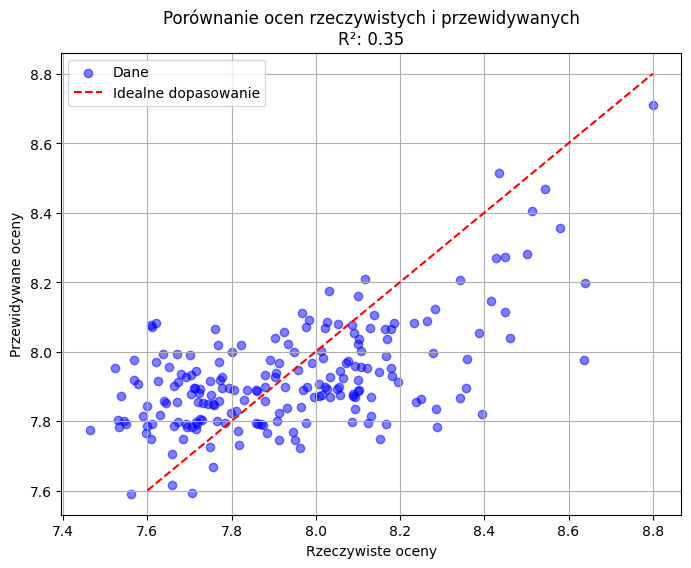

In [574]:
# przewidywania
y_pred = best_lasso.predict(X_test_scaled)

# obliczam metryki
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# wyniki
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')
# im cecha wyzsza ma wartosc tym dana cecha ma wieksza wartosc na przewidywana wartosc
# X = df[['Released_Year', 'Runtime','No_of_Votes', 'Gross', 'Meta_score']]
# wychodzi na to, ze released_year i gross maja negatywny wplyw na przewidywana wartosc
print("Współczynniki cech:", lasso_model.coef_)

# wykres
plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Dane')
# dodaje troche rozrzutu dla widocznosci, bo to wyzej nachodzi na siebie
plt.scatter(y_test + np.random.normal(0, 0.05, size=len(y_test)), y_pred, color='blue', alpha=0.5, label='Dane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste oceny')
plt.ylabel('Przewidywane oceny')
plt.title(f'Porównanie ocen rzeczywistych i przewidywanych\nR²: {r2:.2f}')
plt.legend()
plt.grid()
plt.show()

BUDUJE MODEL WYKORZYSTUJAC INFORAMCJE Z LASSO REGRESSION KTORE CECHY SA ISTOTNE

Ujemne współczynniki niekoniecznie oznaczają, że cecha jest nieistotna.

W rzeczywistości ujemne współczynniki mogą odzwierciedlać odwrotne zależności między cechą a zmienną docelową (np. wyższy czas trwania filmu może oznaczać niższe oceny, a więc współczynnik będzie ujemny)!!

In [575]:
# wybór cech
X = df[['Runtime','No_of_Votes','Meta_score']]
# zmienna docelowa
y = df['IMDB_Rating']

In [576]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [577]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [578]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

MSE: 0.0466
RMSE: 0.2159
R²: 0.2883


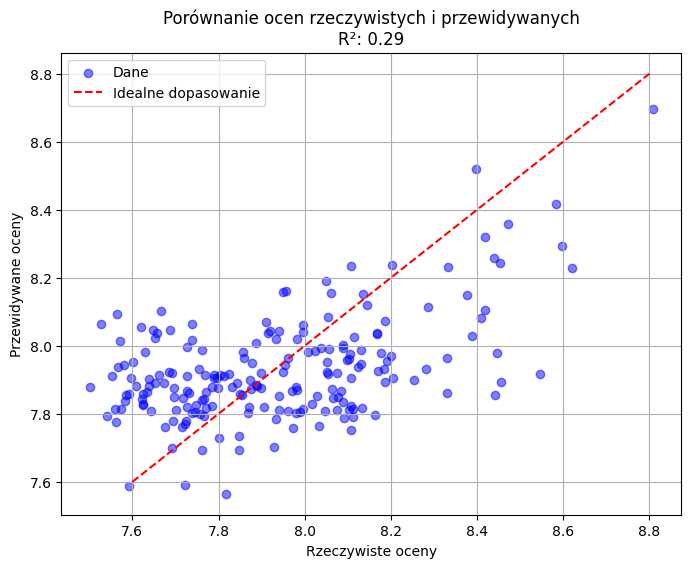

In [579]:
# przewidywania
y_pred = model.predict(X_test_scaled)

# obliczam metryki
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# wyniki
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# wykres
plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Dane')
# dodaje troche rozrzutu dla widocznosci, bo to wyzej nachodzi na siebie
plt.scatter(y_test + np.random.normal(0, 0.05, size=len(y_test)), y_pred, color='blue', alpha=0.5, label='Dane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste oceny')
plt.ylabel('Przewidywane oceny')
plt.title(f'Porównanie ocen rzeczywistych i przewidywanych\nR²: {r2:.2f}')
plt.legend()
plt.grid()
plt.show()

Jak widac po usunięciu cech z ujemnymi współczynnikami w regresji Lasso może prowadzić do gorszych wyników, ponieważ możesz usuwać cechy, które mimo ujemnych współczynników mają wartość predykcyjną, co ogranicza zdolność modelu do uchwycenia rzeczywistych wzorców w danych

Regresja metodą elastycznej siatki

In [580]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.1)

elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1)

MSE: 0.0466
RMSE: 0.2158
R²: 0.2884


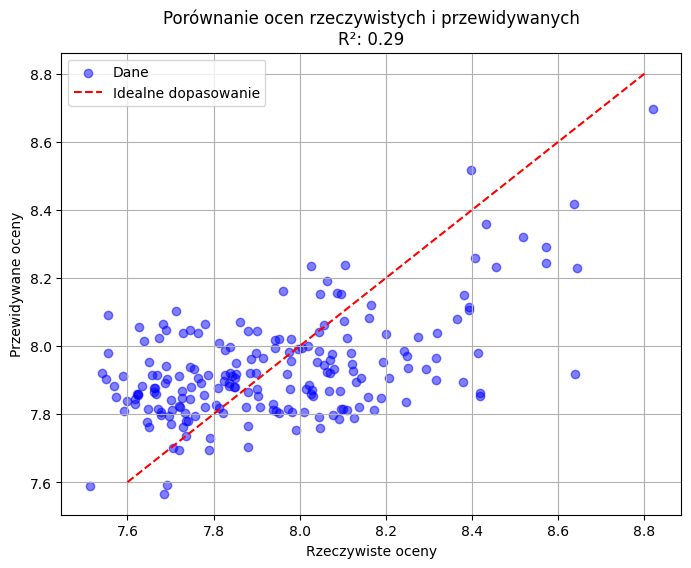

In [581]:
# przewidywania
y_pred = elastic_net.predict(X_test_scaled)

# obliczam metryki
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# wyniki
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# WYKRES
plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Dane')
# dodaje troche rozrzutu dla widocznosci, bo to wyzej nachodzi na siebie
plt.scatter(y_test + np.random.normal(0, 0.05, size=len(y_test)), y_pred, color='blue', alpha=0.5, label='Dane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste oceny')
plt.ylabel('Przewidywane oceny')
plt.title(f'Porównanie ocen rzeczywistych i przewidywanych\nR²: {r2:.2f}')
plt.legend()
plt.grid()
plt.show()

Uzywajac gird search w elastic net

In [582]:
# zakresy dla parametrow

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.2, 0.5, 0.7, 1]
}

# inicjalizuje model
elastic_net = ElasticNet()

# przeszukuje siatke
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Best score: 0.317378670944947
